In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics
from scipy.stats import zscore
import matplotlib.pyplot as plt 

In [2]:
wine_df = pd.read_csv('wine.xls', names = ["Cultivator", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"])

In [3]:
wine_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cultivator,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alchol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity_of_Ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Falvanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [4]:
wine_df.head(10)  #let us look at the raw data. As is evident, there are lot of missing values 

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [5]:
wine_df.shape

(178, 14)

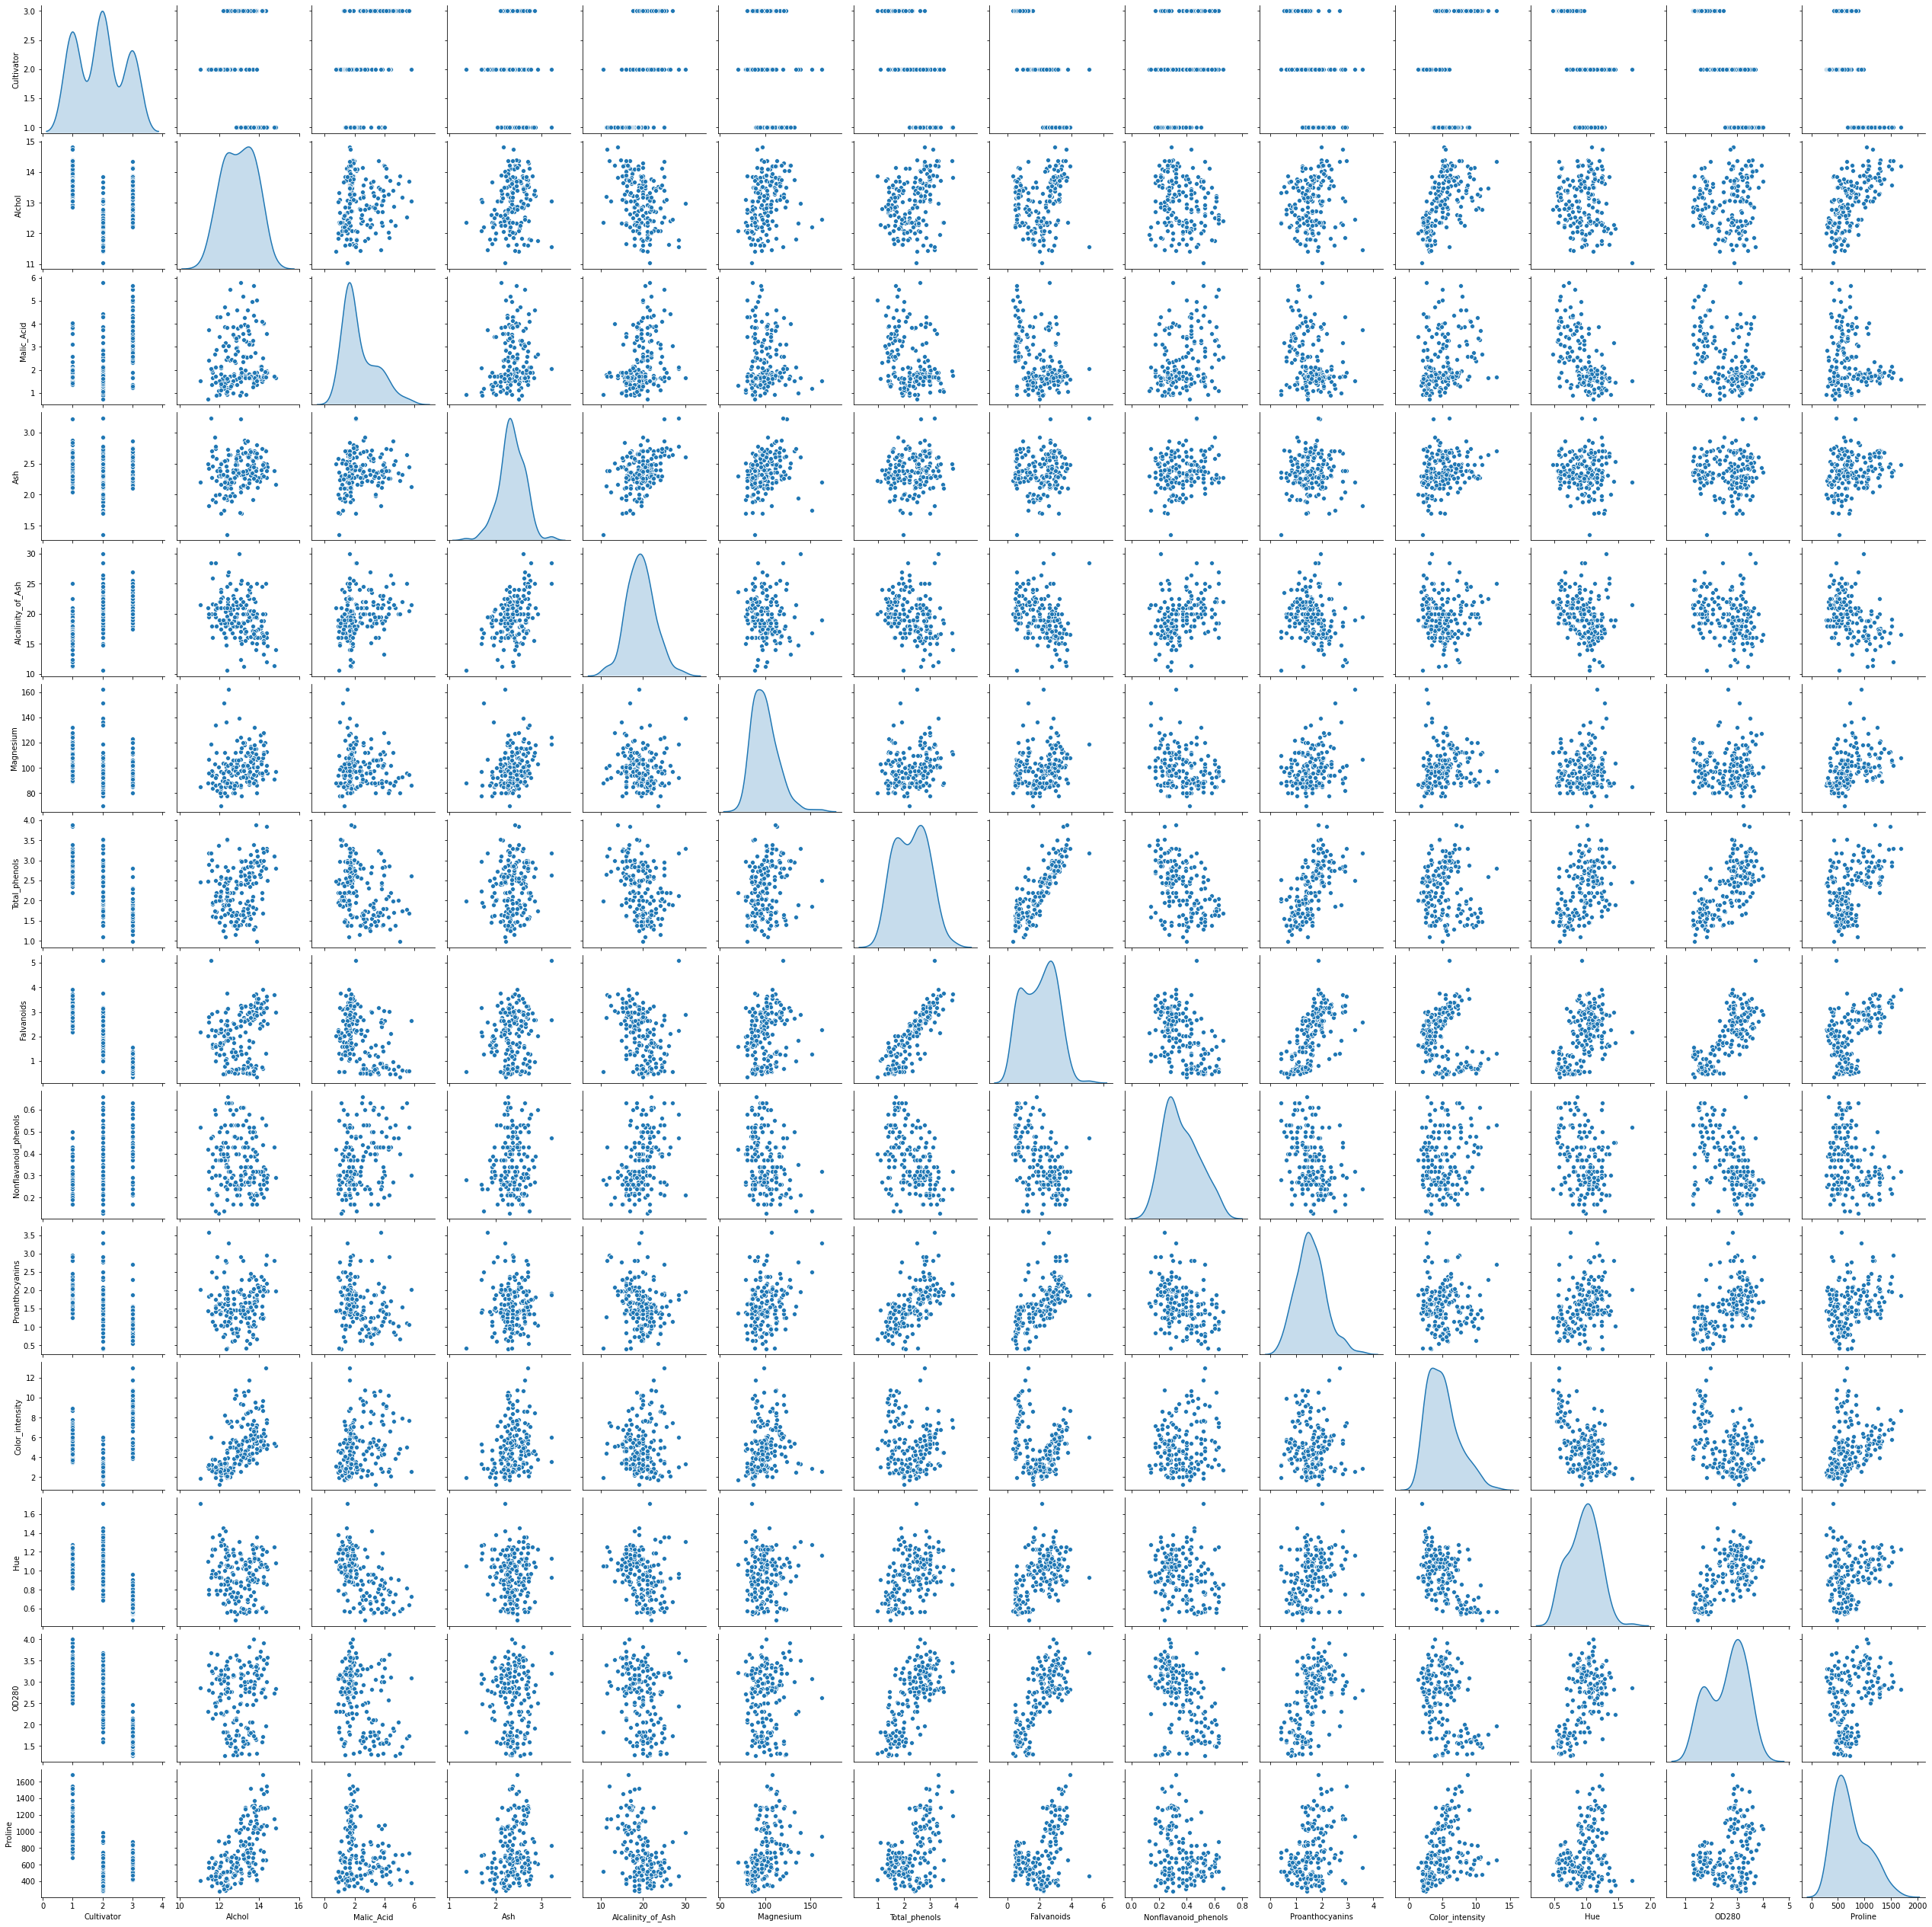

In [7]:
import seaborn as sns
sns.pairplot(wine_df,diag_kind='kde')

In [8]:
wine_df.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cultivator            178 non-null    int64  
 1   Alchol                178 non-null    float64
 2   Malic_Acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity_of_Ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_phenols         178 non-null    float64
 7   Falvanoids            178 non-null    float64
 8   Nonflavanoid_phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280                 178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [9]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split
X =  wine_df.drop("Cultivator", axis=1)
y =  wine_df.pop("Cultivator")
X_std = StandardScaler().fit_transform(X)
train_set, test_set, train_labels, test_labels = train_test_split(X_std, y, test_size=0.30, random_state=2)

In [10]:
train_set[:5,:]

array([[-0.87780149,  0.74833839, -0.57212246, -0.44890919, -0.82441507,
         0.88911397,  0.96454129,  0.71026392,  2.13596773, -1.19306689,
         2.02936599,  0.3083569 , -1.08557245],
       [-0.14899516,  0.58675903,  0.12239231,  0.15166079,  0.29899838,
        -1.59449993, -0.81247981, -0.98187536, -1.33315885,  0.14790005,
        -0.95402434, -1.68318747, -0.69069522],
       [ 0.59216382, -0.59815632,  0.99967413,  0.90237327, -0.75420173,
         0.48853108, -0.93295582,  1.27431034,  1.22488398,  2.89471945,
        -1.69987192, -1.17470806, -0.40409079],
       [ 0.35746347, -0.32885738,  1.14588777, -0.80925118,  0.1585717 ,
         1.1294637 ,  1.2054933 , -0.41782893,  0.12107098,  0.40744204,
         0.49379744,  0.32248133,  1.66583014],
       [ 1.0615645 , -0.74178243,  1.10933436,  1.65308575, -0.96484175,
         1.04934713,  0.83402561, -1.22360954,  0.48900865, -0.72589131,
         1.76612566,  0.77446303, -1.07283447]])

In [11]:
Dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3,random_state=0 )

In [12]:
Rf_model = RandomForestClassifier(n_estimators=51,criterion='entropy',max_depth=3,random_state=0 )

In [13]:
Rf_model.fit(train_set, train_labels)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=51,
                       random_state=0)

In [14]:
Dt_model.fit(train_set,train_labels)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [15]:
y_predict_Rf=Rf_model.predict(test_set)

In [16]:
y_predict_Dt=Dt_model.predict(test_set)

In [17]:
Rf_acc=metrics.accuracy_score(test_labels,y_predict_Rf)
print(Rf_acc)

0.9629629629629629


In [18]:
Dt_acc=metrics.accuracy_score(test_labels,y_predict_Dt)
print(Dt_acc)

0.8518518518518519


In [19]:
Rf_cr=metrics.classification_report(test_labels , y_predict_Rf)
print(Rf_cr)

              precision    recall  f1-score   support

           1       1.00      0.90      0.95        20
           2       0.91      1.00      0.95        20
           3       1.00      1.00      1.00        14

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.97      0.96      0.96        54



In [20]:
Dt_cr=metrics.classification_report(test_labels , y_predict_Dt)
print(Dt_cr)

              precision    recall  f1-score   support

           1       0.86      0.95      0.90        20
           2       0.77      0.85      0.81        20
           3       1.00      0.71      0.83        14

    accuracy                           0.85        54
   macro avg       0.88      0.84      0.85        54
weighted avg       0.87      0.85      0.85        54



In [21]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.Series(Rf_model.feature_importances_,index = list(X)).sort_values(ascending=False))


Falvanoids              0.203775
Proline                 0.155502
Color_intensity         0.153918
OD280                   0.117467
Alchol                  0.108056
Total_phenols           0.074336
Hue                     0.050709
Malic_Acid              0.043671
Magnesium               0.030017
Alcalinity_of_Ash       0.024648
Proanthocyanins         0.019764
Nonflavanoid_phenols    0.011306
Ash                     0.006829
dtype: float64


In [22]:
models = []
models.append(('DecisionTree', Dt_model))
models.append(('RandomForest', Rf_model))

DecisionTree: 0.864921 (0.059962)
RandomForest: 0.898730 (0.061416)


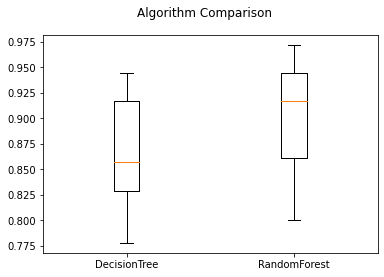

In [23]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=5)
	cv_results = model_selection.cross_val_score(model, X_std, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [24]:
results

[array([0.91666667, 0.94444444, 0.77777778, 0.82857143, 0.85714286]),
 array([0.91666667, 0.86111111, 0.94444444, 0.97142857, 0.8       ])]